# Libraries

In [1]:
# Data wrangling
import pandas as pd
import numpy as np
import sidetable as stb

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Statistics
from scipy import stats

## Libraries Settings

In [2]:
# Seaborn settings
sns.set_theme(
    context="notebook",
    style="ticks",
    palette="colorblind",
    font_scale=.8, 
    rc = {
        "axes.grid": False,
        "grid.alpha": .2,
        "axes.titlesize": "x-large",
        "axes.titleweight": "bold",
        "axes.titlepad": 20
    }
)

# Load dataset

In [3]:
# Read csv
df_raw =  pd.read_csv('../data/raw/customer_churn.csv')
df_raw.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Understanding

In [4]:
# Information of raw DataFrame
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# Check for missing values
df_raw.stb.missing()

,missing,total,percent
customerID,0,7043,0.0
DeviceProtection,0,7043,0.0
TotalCharges,0,7043,0.0
MonthlyCharges,0,7043,0.0
PaymentMethod,0,7043,0.0
PaperlessBilling,0,7043,0.0
Contract,0,7043,0.0
StreamingMovies,0,7043,0.0
StreamingTV,0,7043,0.0
TechSupport,0,7043,0.0


There aren't missing values in raw DataFrame.

In [6]:
# Check for duplicates
print(df_raw.duplicated().any())
print(df_raw.duplicated().sum())

False
0


There aren't duplicated rows.

In [7]:
# Check target feature
df_raw['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [8]:
# Check target feature in percentage
df_raw['Churn'].value_counts(normalize=True) * 100

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

There is a certain imbalance between the classes of the target feature.

# EDA

In [9]:
# SeniorCitizen must be categorical
df = df_raw.copy().drop(columns='customerID')
df['SeniorCitizen'] = df['SeniorCitizen'].map({1:'Yes', 0:'No'})

# TotalCharges must be numerical
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna(subset='TotalCharges')

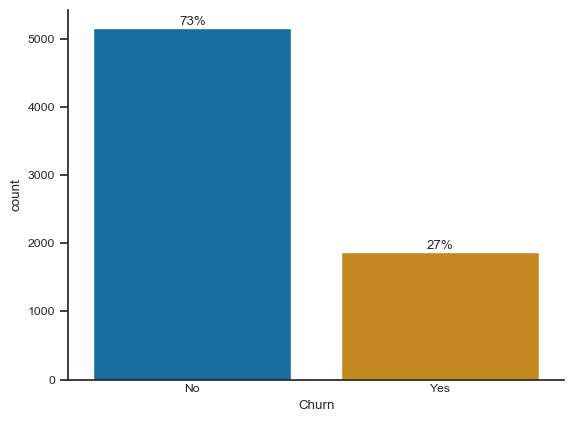

In [10]:
# Target feature proportion
fig, ax = plt.subplots()
sns.countplot(data=df, x='Churn', hue='Churn')
heights = df['Churn'].value_counts()
for i, height in enumerate(heights):
    ax.text(i, height, f'{height/df.shape[0]:.0%}', ha='center', va='bottom')
    ax.tick_params(axis='x', which='both', length=0)
sns.despine()

In [11]:
# Selecting categorical and numerical features
cat_cols = df.select_dtypes(exclude='number').columns.drop('Churn')
num_cols = df.select_dtypes(include=('float64', 'int64')).columns

## Association between target and categorical features

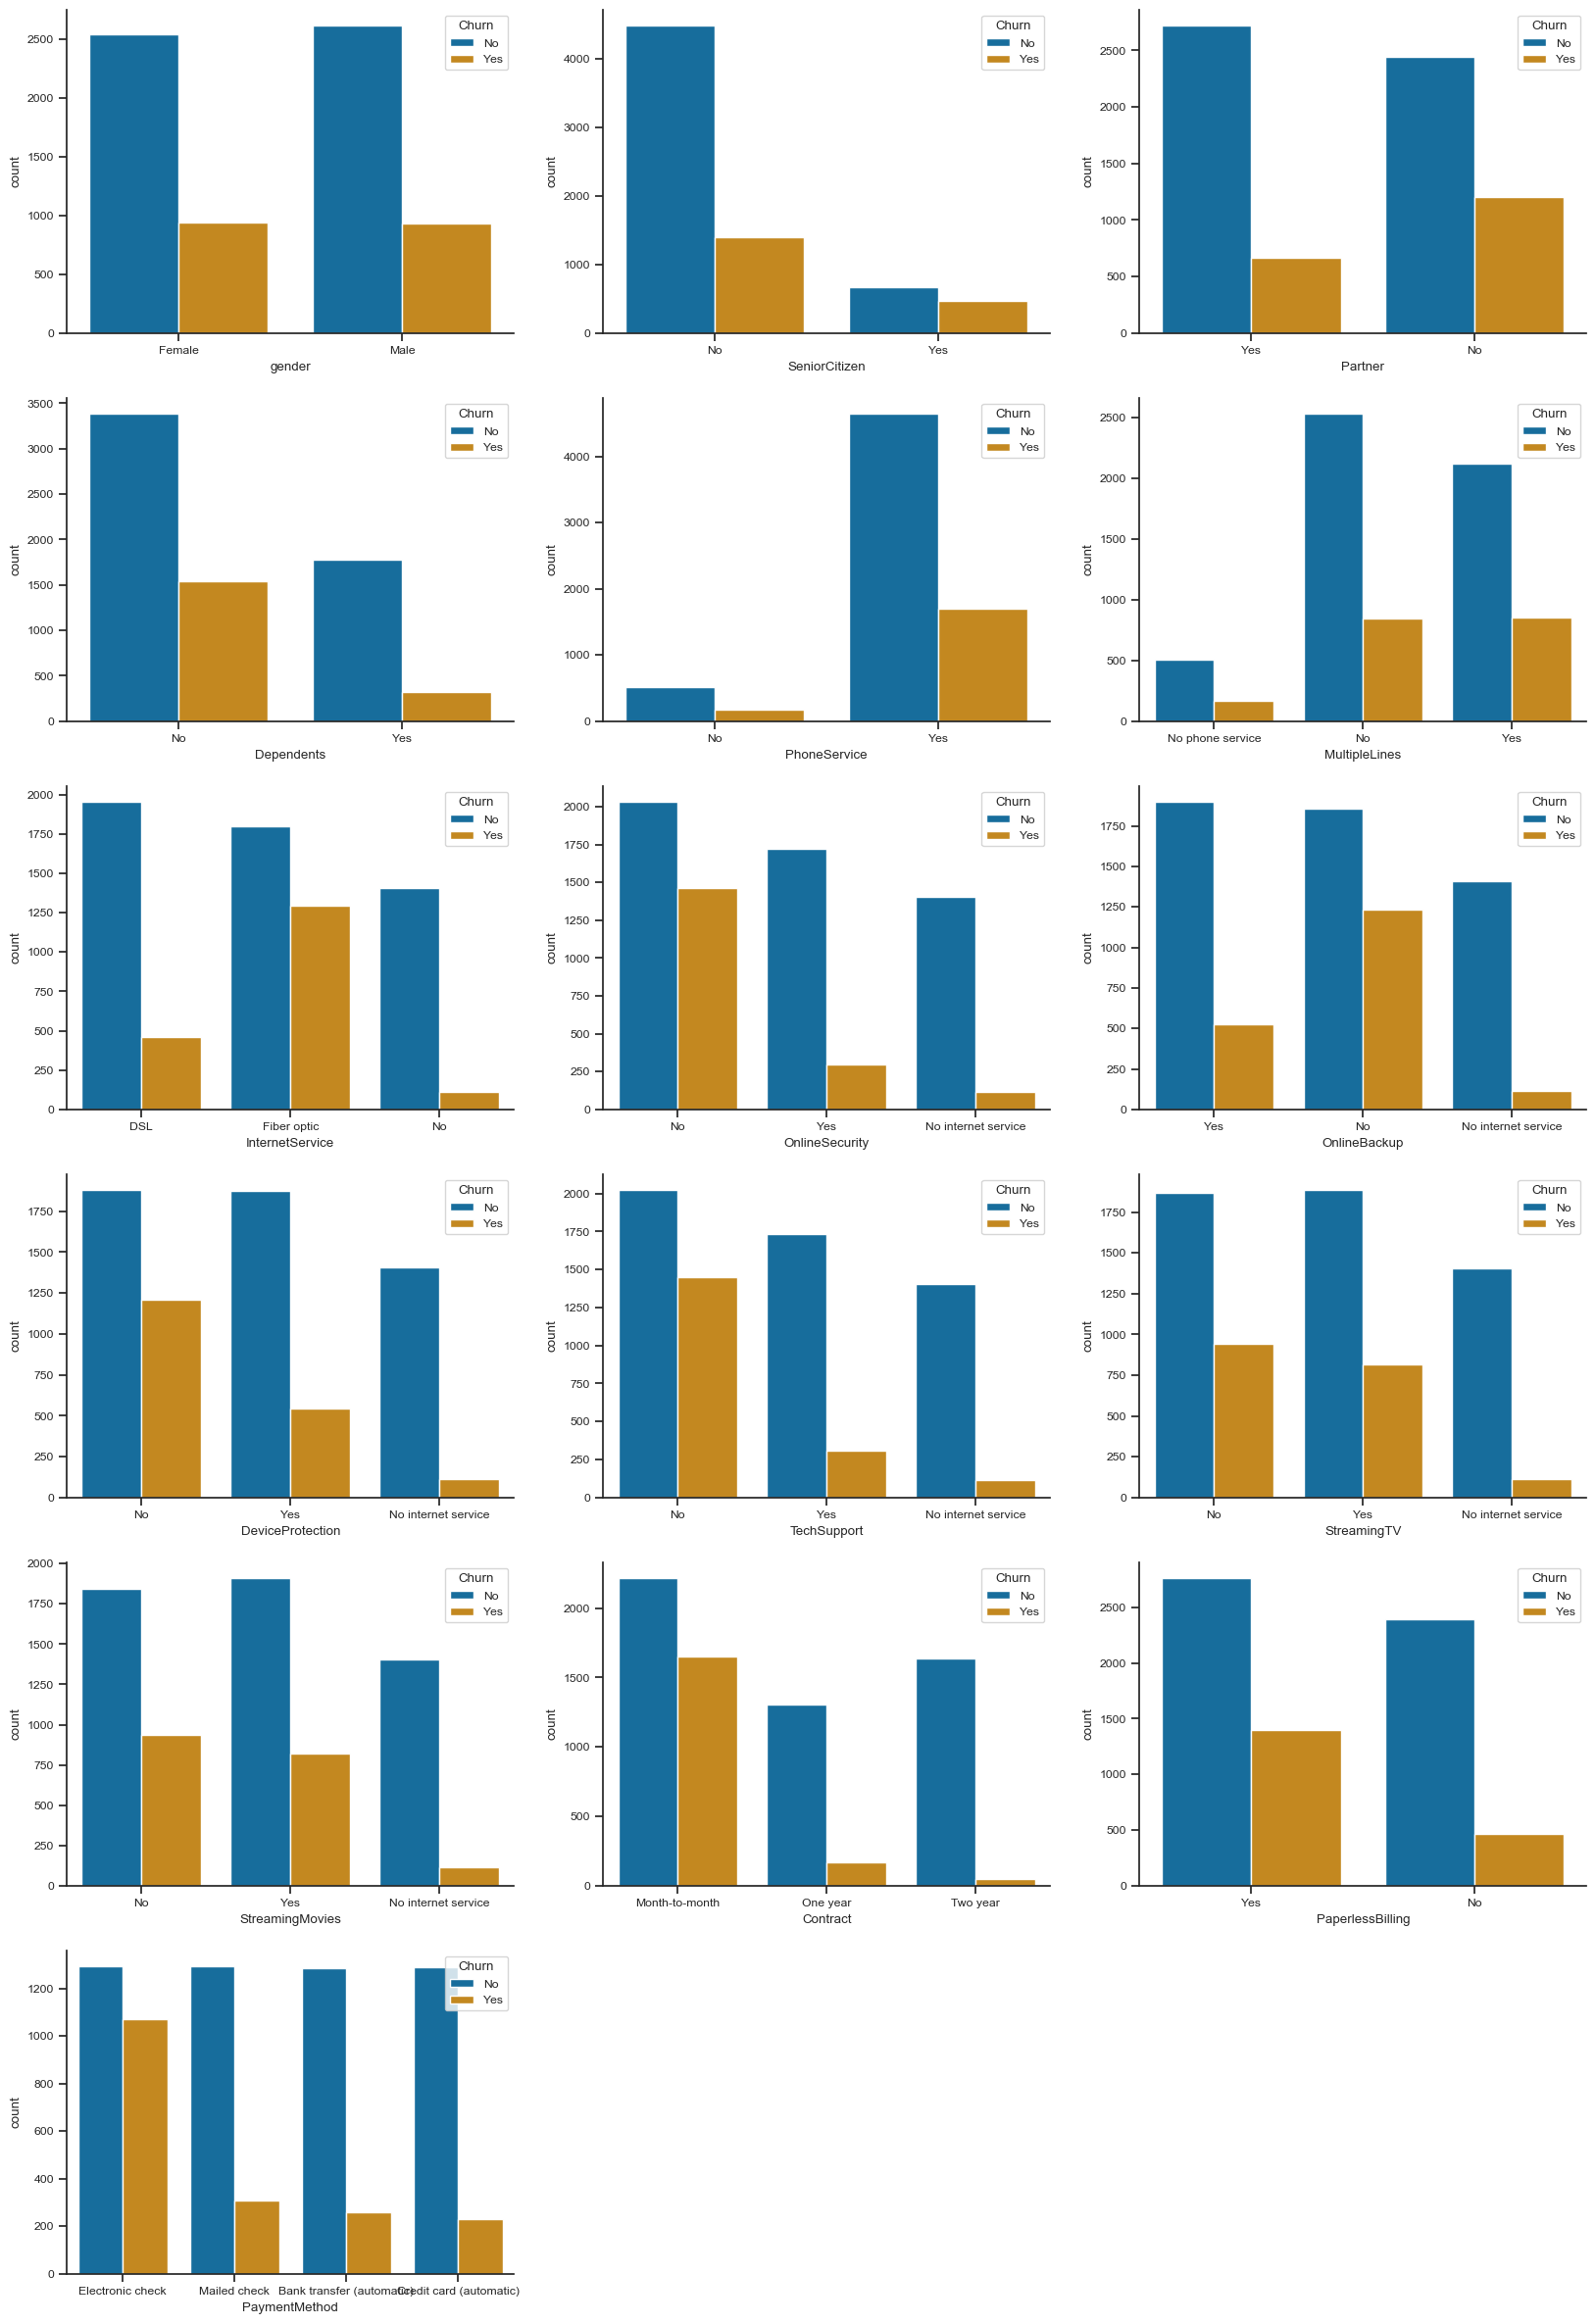

In [12]:
# Count of each class of categorical features according to Churn
ncols = 3
nrows = int(np.ceil(len(cat_cols) / ncols))
fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(20, 30))
axes = axes.flatten()
for i, col in enumerate(cat_cols):
    sns.countplot(data=df, x=col, hue='Churn', ax=axes[i])
    sns.despine()
    for ax in axes[len(cat_cols):]:
        ax.set_axis_off()

In [13]:
# Create dataframe with p-values and chi2 values
df_chi2 = pd.DataFrame({
    col: stats.chi2_contingency(
        pd.crosstab(df[col], df['Churn']),
        correction=True)[:2] \
        for col in cat_cols},
        index=['chi2', 'p-value']
)

df_chi2.T.style.background_gradient(cmap='Oranges')

,chi2,p-value
gender,0.475455,0.490488
SeniorCitizen,158.440816,0.000000
Partner,157.503151,0.000000
Dependents,186.321639,0.000000
PhoneService,0.873733,0.349924
MultipleLines,11.271541,0.003568
InternetService,728.695614,0.000000
OnlineSecurity,846.677389,0.000000
OnlineBackup,599.175185,0.000000
DeviceProtection,555.880327,0.000000


## Association between target and numerical features

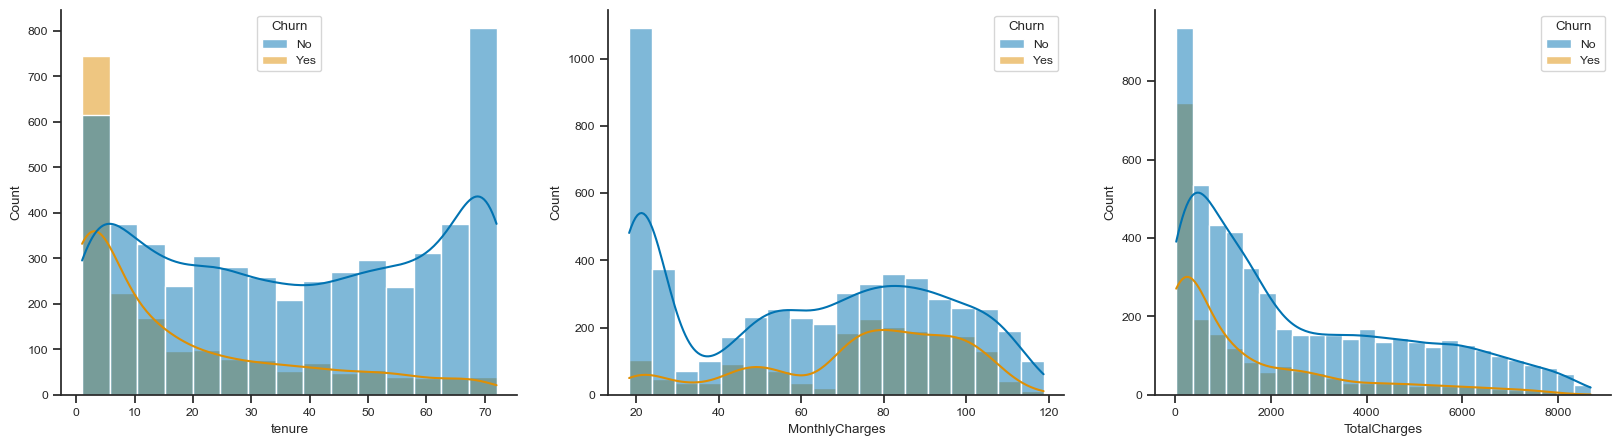

In [14]:
# Distribution of numerical features according to Churn
ncols = 3
nrows = int(np.ceil(len(num_cols)) / ncols)

fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(20, 5))
for i, col in enumerate(num_cols):
    sns.histplot(data=df, x=col, hue='Churn', kde=True, ax=axes[i])
    sns.despine()

In [15]:
df_ttest = pd.DataFrame({
    stats.ttest_ind(df[df['Churn'] == 'Yes'][col],
                    df[df['Churn'] == 'No'][col])[:2] \
                    for col in num_cols},
                    index=[num_cols],
                    columns=['ttest', 'p-values']
)

df_ttest.style.background_gradient(cmap='Oranges')

,ttest,p-values
tenure,-31.741289,0.000000
MonthlyCharges,-17.068827,0.000000
TotalCharges,16.479593,0.000000
